# la théorie de Dempster-Shafer

In [1]:
from pyds import MassFunction
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

sns.set_theme()

## EXERCICE 1

In [2]:
# exo1
# Représentation ces connaissances en utilisant la théorie de Dempster-Shafer

print('=== Création de la distribution de masse ===')
# Utilisation d'une liste de tuples
EXP1= MassFunction([({'P','C'}, 0.65), ({'S'}, 0.24), ({}, 0.11)]) 
print('Expert 1 =', EXP1)
EXP2 = MassFunction([({'S'}, 0.48), ({}, 0.52)])  
print('Expert 2 =', EXP2)
EXP3 = MassFunction([({'P'}, 0.33),({'C'}, 0.33), ({'S'}, 0.33) ])  
print('Expert 3 =', EXP3)

=== Création de la distribution de masse ===
Expert 1 = {{'P', 'C'}:0.65; {'S'}:0.24; set():0.11}
Expert 2 = {set():0.52; {'S'}:0.48}
Expert 3 = {{'P'}:0.33; {'C'}:0.33; {'S'}:0.33}


In [3]:
#affichage de croyance et plausibilité pour chaque expert
print("\n=== Croyance et possibilité pour l'expert 1 ===")
print("bel_1 = ", EXP1.bel())
print("pl_1 = ", EXP1.pl())

print("\n=== Croyance et possibilité pour l'expert 2 ===")
print("bel_2 = ", EXP2.bel())
print("pl_2 = ", EXP2.pl())

print("\n=== Croyance et possibilité pour l'expert 3 ===")
print("bel_3 = ", EXP3.bel())
print("pl_3 = ", EXP3.pl())


=== Croyance et possibilité pour l'expert 1 ===
bel_1 =  {frozenset(): 0.0, frozenset({'P'}): 0.0, frozenset({'C'}): 0.0, frozenset({'S'}): 0.24, frozenset({'P', 'C'}): 0.65, frozenset({'P', 'S'}): 0.24, frozenset({'C', 'S'}): 0.24, frozenset({'P', 'C', 'S'}): 0.89}
pl_1 =  {frozenset(): 0.0, frozenset({'P'}): 0.65, frozenset({'C'}): 0.65, frozenset({'S'}): 0.24, frozenset({'P', 'C'}): 0.65, frozenset({'P', 'S'}): 0.89, frozenset({'C', 'S'}): 0.89, frozenset({'P', 'C', 'S'}): 0.89}

=== Croyance et possibilité pour l'expert 2 ===
bel_2 =  {frozenset(): 0.0, frozenset({'S'}): 0.48}
pl_2 =  {frozenset(): 0.0, frozenset({'S'}): 0.48}

=== Croyance et possibilité pour l'expert 3 ===
bel_3 =  {frozenset(): 0.0, frozenset({'P'}): 0.33, frozenset({'C'}): 0.33, frozenset({'S'}): 0.33, frozenset({'P', 'C'}): 0.66, frozenset({'P', 'S'}): 0.66, frozenset({'C', 'S'}): 0.66, frozenset({'P', 'C', 'S'}): 0.99}
pl_3 =  {frozenset(): 0.0, frozenset({'P'}): 0.33, frozenset({'C'}): 0.33, frozenset({'S'}

In [4]:

print('\n=== Combinaisons des masses conjunctive de Dempster-Shafer ===')
print('Combinaisons des masses de EXP1, EXP2, and EXP2 =', EXP3.combine_conjunctive(EXP1, EXP2))


=== Combinaisons des masses conjunctive de Dempster-Shafer ===
Combinaisons des masses de EXP1, EXP2, and EXP2 = {{'P'}:0.42207792207792205; {'C'}:0.42207792207792205; {'S'}:0.15584415584415584}


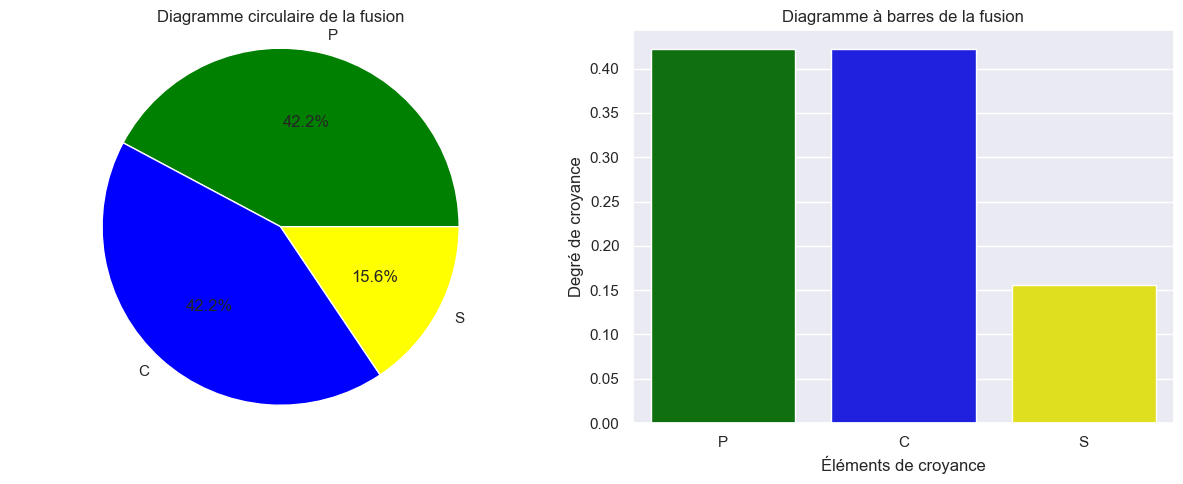

In [5]:
# Visualisation des resultats
# Récupérez les résultats de la fusion de masses
result = EXP3.combine_conjunctive(EXP1, EXP2)

# Obtenez les éléments focaux et leurs valeurs
labels = []  # Liste pour stocker les éléments focaux
values = []  # Liste pour stocker les valeurs associées

for focal_element in result:
    elements = list(focal_element)
    label = ", ".join(elements)  # Convertit le frozenset en une chaîne de caractères
    value = result.bel(focal_element)  # La valeur associée à l'élément focaux
    labels.append(label)
    values.append(value)

# Créez un subplot avec deux graphiques côte à côte
plt.figure(figsize=(12, 5))

# Subplot 1: Diagramme circulaire
plt.subplot(1, 2, 1)
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['green', 'blue', 'yellow'])
plt.title('Diagramme circulaire de la fusion')
plt.axis('equal')  # Assurez-vous que le cercle est dessiné correctement

# Subplot 2: Diagramme à barres
plt.subplot(1, 2, 2)
sns.barplot(x=labels, y=values, palette=['green', 'blue', 'yellow'])
plt.title('Diagramme à barres de la fusion')
plt.xlabel('Éléments de croyance')
plt.ylabel('Degré de croyance')

# Affichez les graphiques
plt.tight_layout()
plt.show()

## Un exemple 

In [6]:
# there is 4 experts
# the classes are sand, rock, vase
# 1- The first expert is 65% sure that the sample is a rock or a sand
# 2- The second expert is 20% sure that the sample is a vase or 55% sure that the sample is a rock
# 3- The third expert is 58% sure that the sample is a vase

# the first expert is 65% sure that the sample is a rock or a sand
expert_1 = MassFunction([({'rock', 'sand'}, 0.65), ({'vase'}, 0.24), ({}, 0.11)])
print('Expert 1 =', expert_1)

# the second expert is 20% sure that the sample is a vase or 55% sure that the sample is a rock
expert_2 = MassFunction([({'sand'}, 0.2), ({'rock', 'vase'}, 0.55), ({}, 0.25)])
print('Expert 2 =', expert_2)

# the third expert is 58% sure that the sample is a vase
expert_3 = MassFunction([({'vase'}, 0.58), ({}, 0.42)])
print('Expert 3 =', expert_3)

experts = [expert_1, expert_2, expert_3]


Expert 1 = {{'rock', 'sand'}:0.65; {'vase'}:0.24; set():0.11}
Expert 2 = {{'vase', 'rock'}:0.55; set():0.25; {'sand'}:0.2}
Expert 3 = {{'vase'}:0.58; set():0.42}


# affichage de croyance et plausibilité pour chaque expert

In [7]:
for index, expert in enumerate(experts):
    print(f"bel_expert_{index+1} = {expert.bel()}")
    print(f"pl_expert_{index+1} = {expert.pl()}\n")

bel_expert_1 = {frozenset(): 0.0, frozenset({'vase'}): 0.24, frozenset({'rock'}): 0.0, frozenset({'sand'}): 0.0, frozenset({'vase', 'rock'}): 0.24, frozenset({'vase', 'sand'}): 0.24, frozenset({'rock', 'sand'}): 0.65, frozenset({'vase', 'rock', 'sand'}): 0.89}
pl_expert_1 = {frozenset(): 0.0, frozenset({'vase'}): 0.24, frozenset({'rock'}): 0.65, frozenset({'sand'}): 0.65, frozenset({'vase', 'rock'}): 0.89, frozenset({'vase', 'sand'}): 0.89, frozenset({'rock', 'sand'}): 0.65, frozenset({'vase', 'rock', 'sand'}): 0.89}

bel_expert_2 = {frozenset(): 0.0, frozenset({'vase'}): 0.0, frozenset({'rock'}): 0.0, frozenset({'sand'}): 0.2, frozenset({'vase', 'rock'}): 0.55, frozenset({'vase', 'sand'}): 0.2, frozenset({'rock', 'sand'}): 0.2, frozenset({'vase', 'rock', 'sand'}): 0.75}
pl_expert_2 = {frozenset(): 0.0, frozenset({'vase'}): 0.55, frozenset({'rock'}): 0.55, frozenset({'sand'}): 0.2, frozenset({'vase', 'rock'}): 0.55, frozenset({'vase', 'sand'}): 0.75, frozenset({'rock', 'sand'}): 0.75, 

# combinaisons des masses par fusion de Dempster-Shafer

In [8]:
indexes = [i for i in range(0, len(experts))]
for expert1, expert2 in combinations(indexes, 2):
    print(f"Combinaisons des masses de expert_{expert1 + 1} et expert_{expert2 + 1} = {experts[expert1].combine_conjunctive(experts[expert2])}")

expert123 = expert_2.combine_conjunctive(expert_1, expert_3)

print(f"Combinaisons des masses de expert_1, expert_2 et expert_3 = {expert123}")


Combinaisons des masses de expert_1 et expert_2 = {{'rock'}:0.5770782889426957; {'vase'}:0.21307506053268765; {'sand'}:0.20984665052461662}
Combinaisons des masses de expert_1 et expert_3 = {{'vase'}:1.0}
Combinaisons des masses de expert_2 et expert_3 = {{'vase'}:1.0}
Combinaisons des masses de expert_1, expert_2 et expert_3 = {{'rock'}:0.5770782889426957; {'vase'}:0.21307506053268765; {'sand'}:0.20984665052461662}


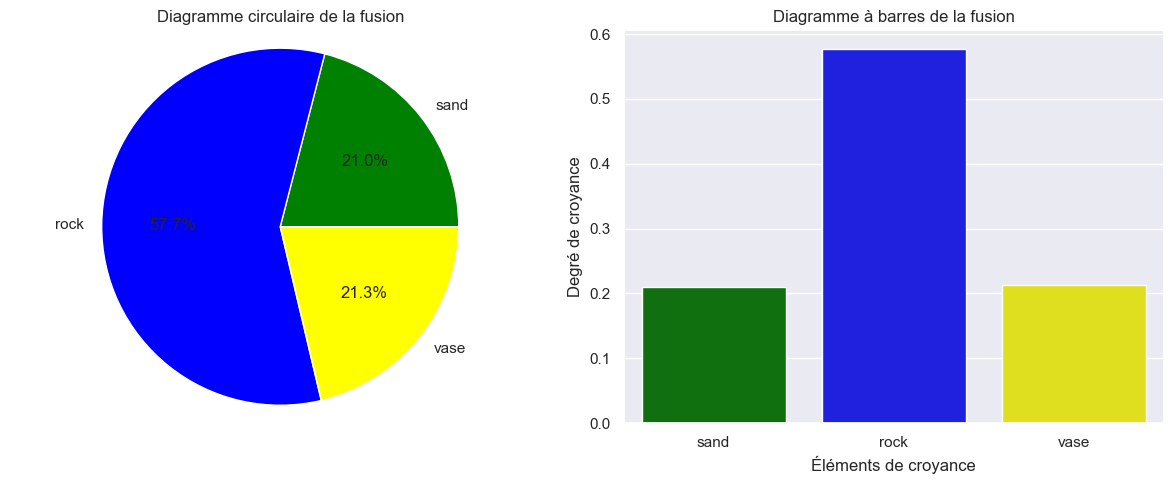

In [9]:
# visualisation
result = expert123

# Obtenez les éléments focaux et leurs valeurs
labels = []  # Liste pour stocker les éléments focaux
values = []  # Liste pour stocker les valeurs associées

for focal_element in result:
    elements = list(focal_element)
    label = ", ".join(elements)  # Convertit le frozenset en une chaîne de caractères
    value = result.bel(focal_element)  # La valeur associée à l'élément focaux
    labels.append(label)
    values.append(value)

# Créez un subplot avec deux graphiques côte à côte
plt.figure(figsize=(12, 5))

# Subplot 1: Diagramme circulaire
plt.subplot(1, 2, 1)
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['green', 'blue', 'yellow'])
plt.title('Diagramme circulaire de la fusion')
plt.axis('equal')  # Assurez-vous que le cercle est dessiné correctement

# Subplot 2: Diagramme à barres
plt.subplot(1, 2, 2)
sns.barplot(x=labels, y=values, palette=['green', 'blue', 'yellow'])
plt.title('Diagramme à barres de la fusion')
plt.xlabel('Éléments de croyance')
plt.ylabel('Degré de croyance')

# Affichez les graphiques
plt.tight_layout()
plt.show()
